In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [162]:
from sklearn.model_selection import cross_val_score
# function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=5,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [163]:
def removing_outliers(col):
    df_filtered=[]
    q_low = df[col].quantile(.25)
    q_high  = df[col].quantile(.75)
    df_filtered=df[(df[col] < q_high) & (df[col] > q_low)]    
    return df_filtered

In [164]:
df = pd.read_csv('cars.csv',index_col=0)

In [165]:
dataf=df.columns.tolist()

In [166]:
dataf

['Ссылка',
 'Модель',
 'Год выпуска',
 'Пробег',
 'Тип кузова',
 'Привод',
 'Трансмиссия',
 'Мощность двиателя',
 'Объём двигателя',
 'Тип двигателя',
 'Цена']

In [167]:
df=df.drop(['Ссылка'],axis=1)

In [168]:
df['Train_set']=df['Тип кузова'].copy()

In [169]:
body=['фургон','родстер','купе-хардтоп','седан','внедорожник 5 дв.','хэтчбек 5 дв.','хэтчбек 3 дв.','лифтбек','универсал 5 дв.','минивэн','компактвэн','купе','пикап двойная кабина','внедорожник 3 дв.','лимузин','микровэн','внедорожник открытый']

In [170]:
df['Тип кузова'].value_counts().head(120)

седан                        10154
внедорожник 5 дв.             7562
универсал 5 дв.               5001
хэтчбек 5 дв.                 4231
минивэн                       1921
                             ...  
пикап полуторная кабина          2
GLC 300 4MATIC купе Sport        2
Design 35 TFSI S tronic          2
Elegance Plus                    2
xDrive20d                        2
Name: Тип кузова, Length: 120, dtype: int64

In [171]:
change_ind=pd.Series(df.loc[~df['Тип кузова'].isin(body)].index).tolist()

In [172]:
df['Тип кузова'] = np.where((~df['Train_set'].isin(body) == True),df['Трансмиссия'].copy(),df['Тип кузова'])
df['Трансмиссия'] = np.where((~df['Train_set'].isin(body) == True),df['Train_set'],df['Трансмиссия'])

#### Исключим редкии типы трансмиссий

In [173]:
#df[df['Трансмиссия'].value_counts() > 1 ]

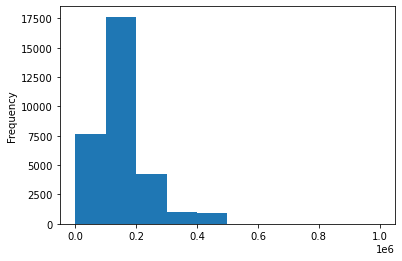

In [174]:
df['Пробег'].plot(kind='hist');

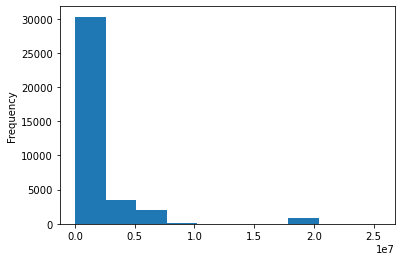

In [175]:
df['Цена'].plot(kind='hist');

In [176]:
df['Пробег']=df['Пробег'].replace(to_replace=np.nan,value=0)

In [177]:
df=df.drop(['Train_set'],axis=1)

In [178]:
df['Мощность двигателя']=df['Мощность двиателя'].rename("Мощность двигателя")

In [179]:
df=df.drop(['Мощность двиателя'],axis=1)

In [180]:
df['Объём двигателя']=df['Объём двигателя'].str.replace(r'\b(\s? л\s?)\b', ' ').str.strip()

In [181]:
df['Объём двигателя']=pd.to_numeric(df['Объём двигателя'],errors='coerce')

In [182]:
df['Мощность двигателя']=df['Мощность двигателя'].str.replace('л.с.','')
df['Мощность двигателя']=pd.to_numeric(df['Мощность двигателя'],errors='coerce')

In [183]:
df['Модель'].value_counts();

In [184]:
df['Марка']=df['Модель'].str.split(expand=True)[0].str.replace('Great','Great Wall')
df['Марка']=df['Модель'].str.split(expand=True)[0].str.replace('Land','Land Rover')

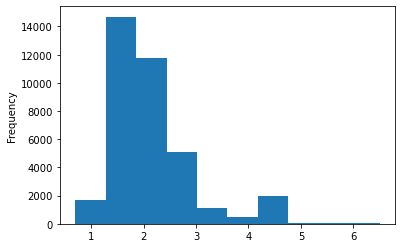

In [185]:
df['Объём двигателя'].plot(kind='hist');

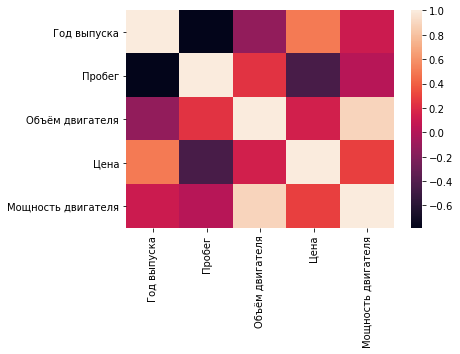

In [186]:
sns.heatmap(df.corr());

In [187]:
df.corr()

,Год выпуска,Пробег,Объём двигателя,Цена,Мощность двигателя
Год выпуска,1.000000,-0.783098,-0.133059,0.503985,0.108677
Пробег,-0.783098,1.000000,0.234000,-0.444891,0.020004
Объём двигателя,-0.133059,0.234000,1.000000,0.137331,0.891659
Цена,0.503985,-0.444891,0.137331,1.000000,0.288001
Мощность двигателя,0.108677,0.020004,0.891659,0.288001,1.000000


In [188]:
df=df.dropna()

Q1 = df["Объём двигателя"].quantile(0.01)
Q3 = df["Объём двигателя"].quantile(0.99)
IQR = Q3 - Q1
df=df[(df["Объём двигателя"] < (Q1 - 1.5 * IQR)) |(df["Объём двигателя"] > (Q3 + 1.5 * IQR))]

sns.boxplot(df["Объём двигателя"]);

sns.boxplot(df["Объём двигателя"]);
#sns.swarmplot(df['Объём двигателя']);

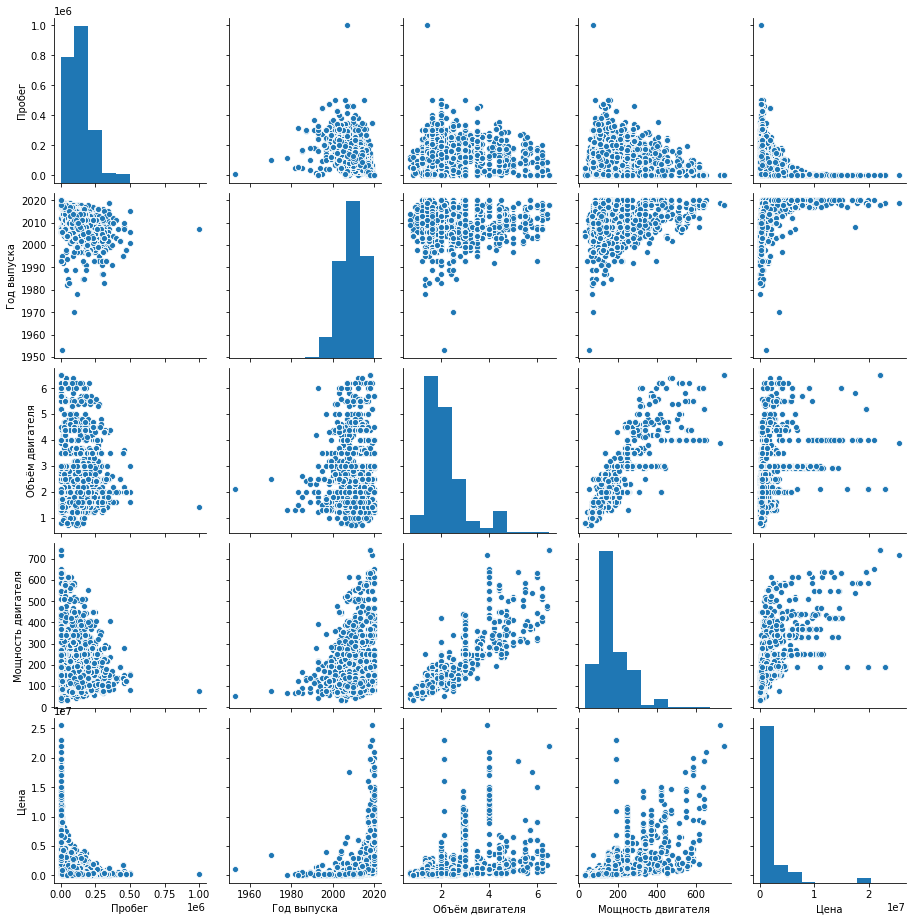

In [189]:
cols = ['Пробег', 'Год выпуска', 'Объём двигателя','Мощность двигателя', 'Цена']
sns_plot = sns.pairplot(df[cols])
sns_plot.savefig('pairplot.png')

#### Из предыдущей диаграммы ясно, что год выпуска <1980 можно не рассматривать.
#### Также можно исключить автомобили с пробегом > 600 000 км.


In [190]:
df=df[df["Год выпуска"] > 1980]

In [191]:
df=df[df["Пробег"]<600000]

In [192]:
#df=df[df['Цена']<7000000]

In [193]:
#df=df[df['Цена']>50000]

In [194]:
#df[df['Мощность двигателя']<250 and df['Цена'] > 15000000]

#### Исключить можно и предиктор "Объём двигателя", в связи со слабой корреляцией с ценой

In [195]:
df=df.drop(['Объём двигателя'],axis=1)

# Feature scaling with StandardScaler 
from sklearn.preprocessing import StandardScaler 
scale_features_std = StandardScaler() 
df = scale_features_std.fit_transform(df) 

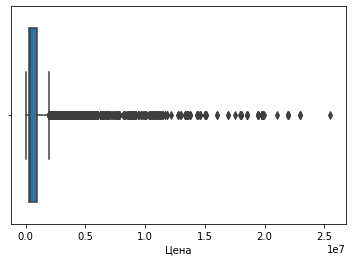

In [196]:
sns.boxplot(df["Цена"]);

Q1 = df["Цена"].quantile(0.25)
Q3 = df["Цена"].quantile(0.75)
IQR = Q3 - Q1
df=df[(df["Цена"] < (Q1 - 1.5*IQR)) |(df["Цена"] > (Q3 + 1.5*IQR))]

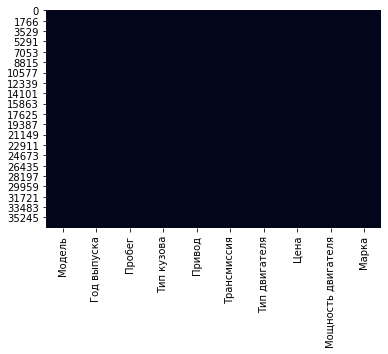

In [197]:
import seaborn as sns
sns.heatmap(df.isnull(),cbar=False);

In [198]:
df.isna().values.any()

False

In [199]:
df=df.dropna()

In [200]:
df=pd.get_dummies(df,columns=['Привод','Марка','Трансмиссия','Тип двигателя','Тип кузова','Модель'])

In [201]:
#df[df.isna().values==True]

In [202]:
#df['Ценовой сегмент'] = '0'
df.loc[df['Цена'].between(0, 100000, inclusive=True), 'Ценовой сегмент'] = '1'
df.loc[df['Цена'].between(100001, 300000, inclusive=True), 'Ценовой сегмент'] = '2'
df.loc[df['Цена'].between(300001, 500000, inclusive=True), 'Ценовой сегмент'] = '3'
df.loc[df['Цена'].between(500001, 700000, inclusive=True), 'Ценовой сегмент'] = '4'
df.loc[df['Цена'].between(700001, 900000, inclusive=True), 'Ценовой сегмент'] = '5'
df.loc[df['Цена'].between(900001, 1100000 , inclusive=True), 'Ценовой сегмент'] = '6'
df.loc[df['Цена'].between(1100001,1300000 , inclusive=True), 'Ценовой сегмент'] = '7'
df.loc[df['Цена'].between(1300001,1500000 , inclusive=True), 'Ценовой сегмент'] = '8'
df.loc[df['Цена'].between(1500001,1700000 , inclusive=True), 'Ценовой сегмент'] = '9'
df.loc[df['Цена'].between(1700001,1900000 , inclusive=True), 'Ценовой сегмент'] = '10'
df.loc[df['Цена'].between(1900001,2000000 , inclusive=True), 'Ценовой сегмент'] = '11'
df.loc[df['Цена'].between(2000001,2200000 , inclusive=True), 'Ценовой сегмент'] = '12'
df.loc[df['Цена'].between(2200001,2400000 , inclusive=True), 'Ценовой сегмент'] = '13'
df.loc[df['Цена'].between(2400001,2600000 , inclusive=True), 'Ценовой сегмент'] = '14'
df.loc[df['Цена'].between(2600001,2800000 , inclusive=True), 'Ценовой сегмент'] = '15'
df.loc[df['Цена'].between(2800001,3000000 , inclusive=True), 'Ценовой сегмент'] = '16'
df.loc[df['Цена'].between(3000001,np.inf , inclusive=True), 'Ценовой сегмент'] = '17'

In [203]:
df.drop(['Цена'],axis=1)

,Год выпуска,Пробег,Мощность двигателя,Привод_задний,Привод_передний,Привод_полный,Марка_Acura,Марка_Alfa,Марка_Aston,Марка_Audi,...,Модель_УАЗ Hunter 315195,Модель_УАЗ Hunter 315196,Модель_УАЗ Patriot I 3163,Модель_УАЗ Patriot I 31631,Модель_УАЗ Patriot I Рестайлинг,Модель_УАЗ Patriot I Рестайлинг 2,Модель_УАЗ Patriot I Рестайлинг 3,Модель_УАЗ Pickup I,Модель_УАЗ Pickup I Рестайлинг,Ценовой сегмент
0,2010,145000.0,240.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
1,2019,21000.0,190.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
2,2006,141000.0,174.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,2007,150000.0,98.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,2020,0.0,249.0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36995,2008,143000.0,141.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
36996,2003,200000.0,192.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
36997,2014,89000.0,306.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
36998,2010,116177.0,105.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [204]:
y=df['Ценовой сегмент'].copy()
X = df.drop(['Ценовой сегмент'],axis=1)

In [205]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [206]:
X_train

,Год выпуска,Пробег,Цена,Мощность двигателя,Привод_задний,Привод_передний,Привод_полный,Марка_Acura,Марка_Alfa,Марка_Aston,...,Модель_ТагАЗ Tager,Модель_УАЗ Hunter 315195,Модель_УАЗ Hunter 315196,Модель_УАЗ Patriot I 3163,Модель_УАЗ Patriot I 31631,Модель_УАЗ Patriot I Рестайлинг,Модель_УАЗ Patriot I Рестайлинг 2,Модель_УАЗ Patriot I Рестайлинг 3,Модель_УАЗ Pickup I,Модель_УАЗ Pickup I Рестайлинг
33854,2010,127020.0,215000,98.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17586,2010,85600.0,110000,73.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5357,2008,143000.0,485000,141.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2058,2008,153004.0,740000,299.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33524,2014,118000.0,950000,136.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16855,2006,196000.0,270000,140.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6270,2006,196000.0,270000,140.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11289,2008,135000.0,250000,120.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,2016,35000.0,4130000,309.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


from nltk import WordNetLemmatizer
#from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest,chi2,f_regression
selector = SelectKBest(chi2, k=100)
selector.fit(X_train, y_train)

X_new = selector.transform(X_train)
print(X_new.shape)

col=X_train.columns[selector.get_support(indices=True)]
X_train=X_train[col]
X_test =X_test[col]

#from sklearn.linear_model import LinearRegression
#from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=10,random_state=0)
regressor.fit(X_train,y_train)
regressor.score(X_test,y_test)
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

In [207]:
from sklearn import svm
# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)

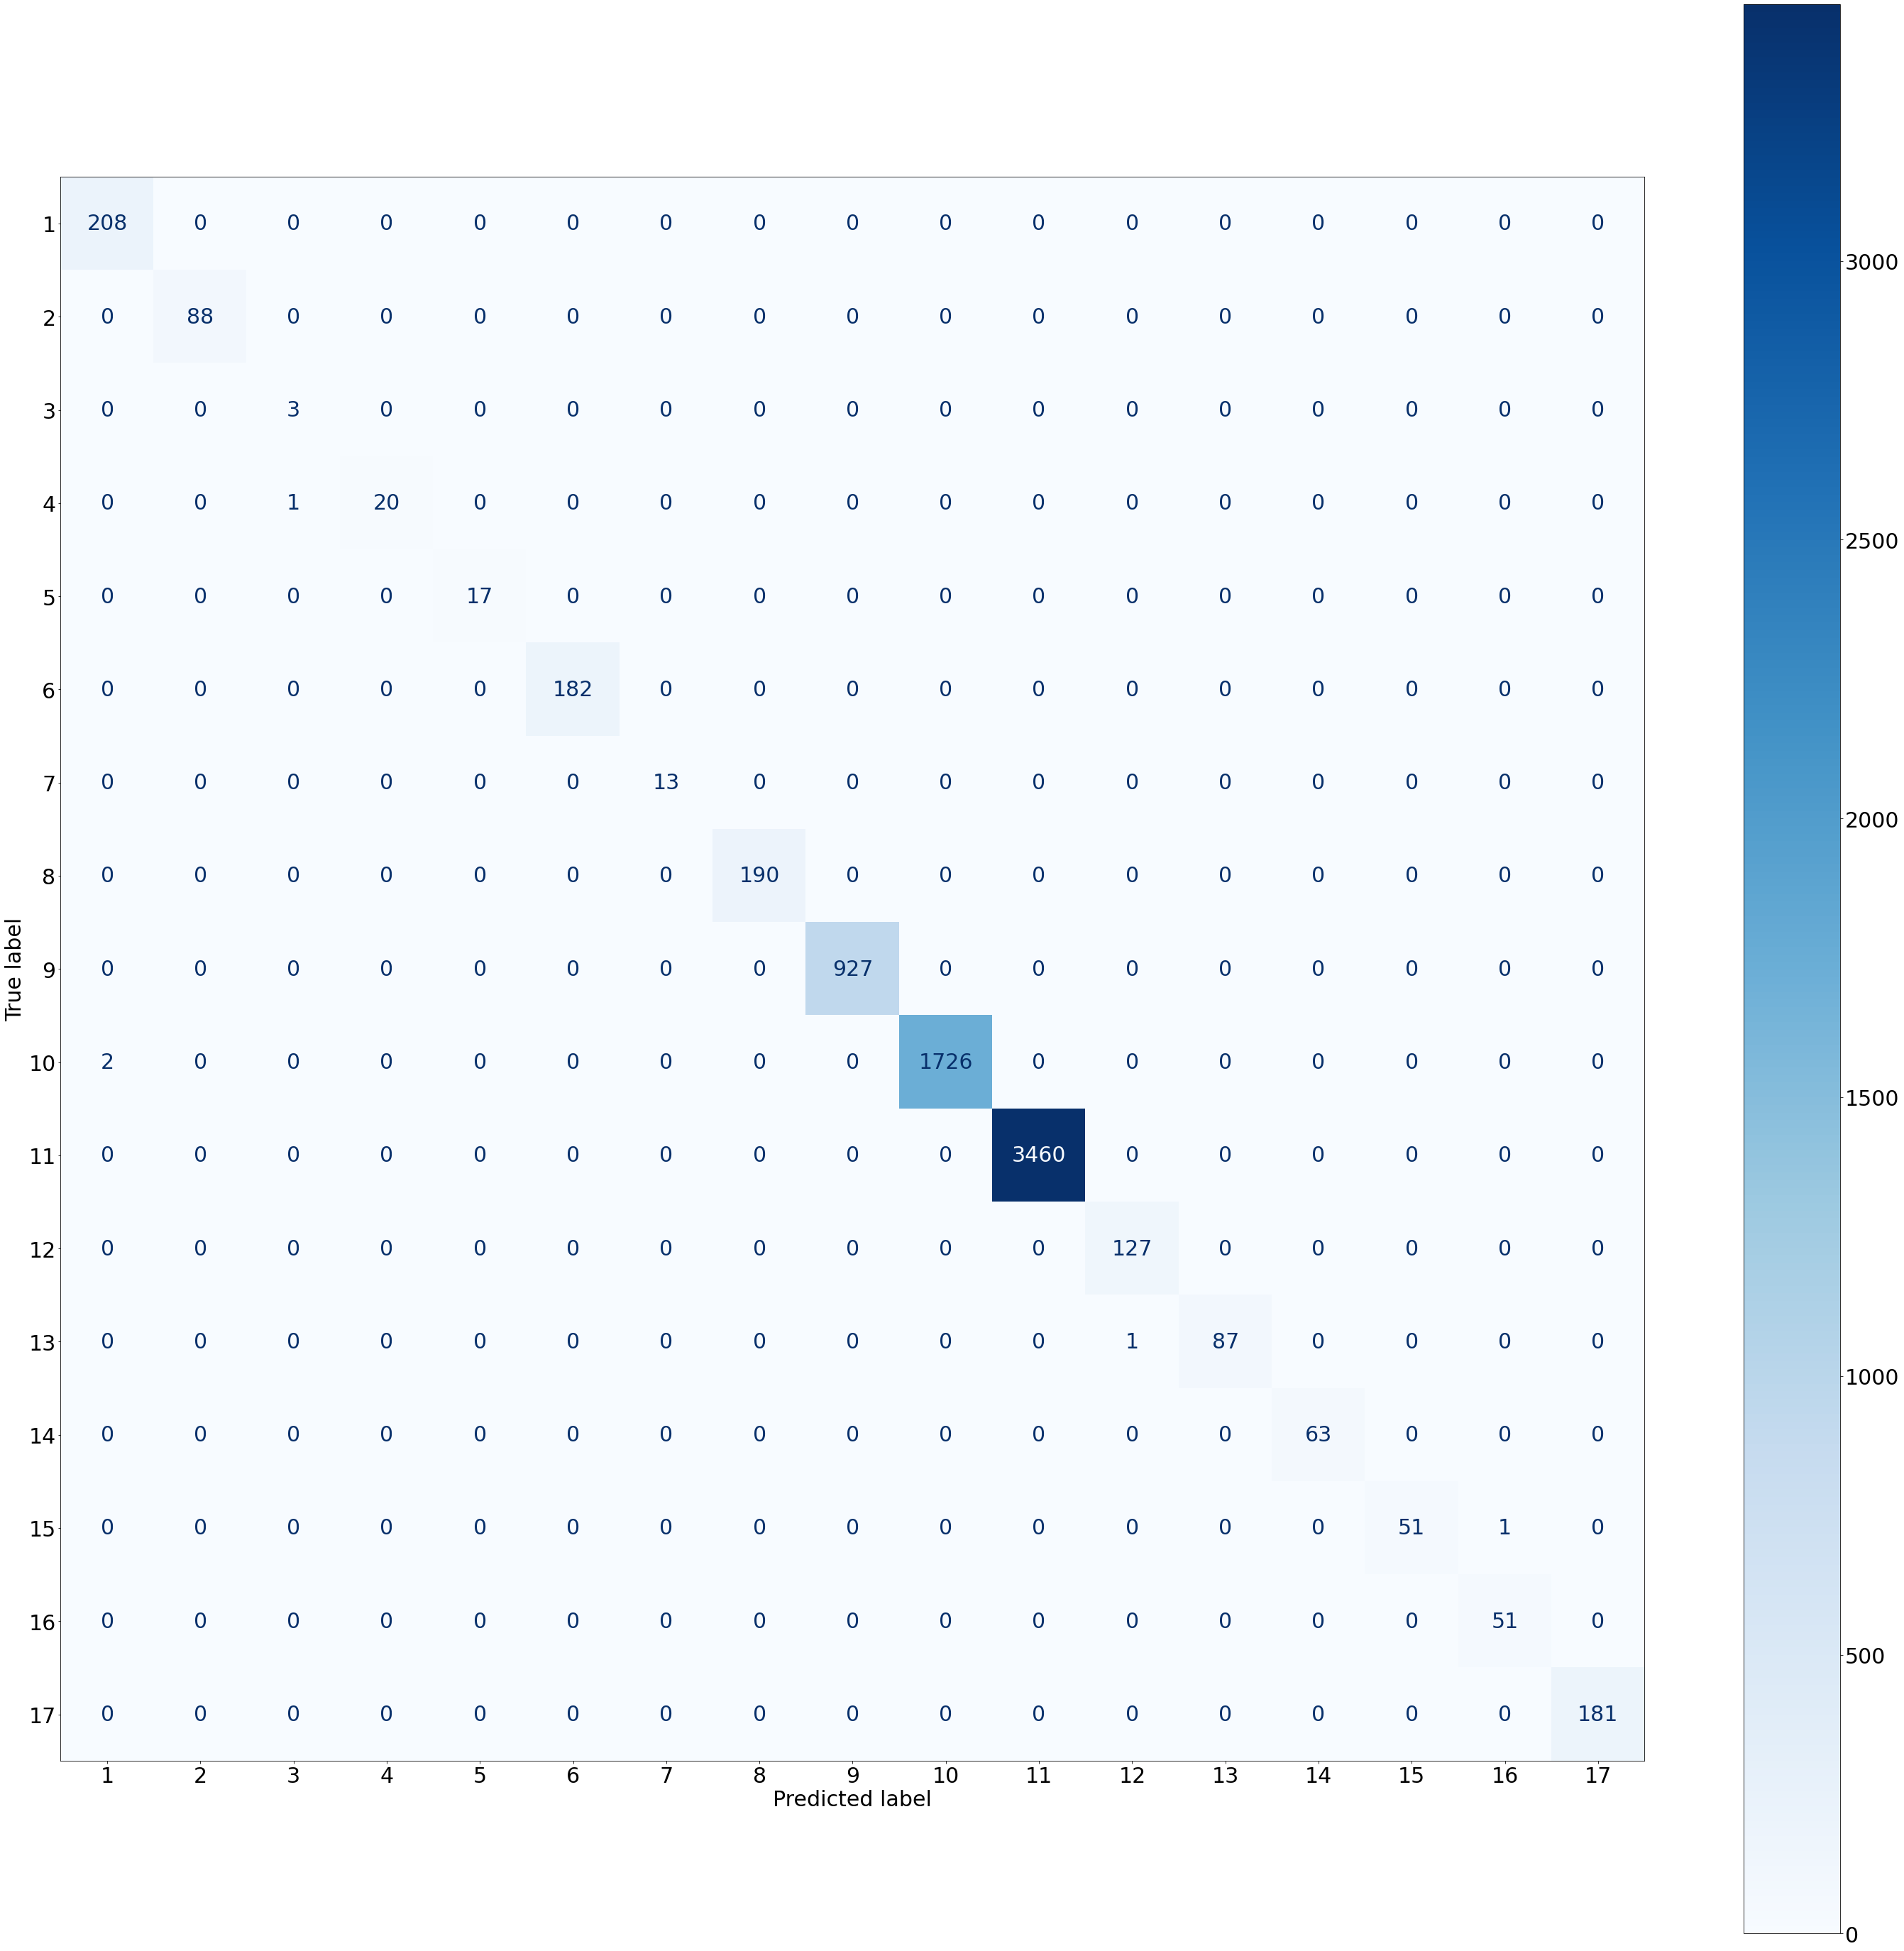

In [216]:
plt.rcParams["figure.figsize"]=(50,50)
plt.rcParams['font.size'] = 30.0
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(classifier, X_test, y_test,display_labels=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17'],cmap=plt.cm.Blues,normalize=None)

In [52]:
#model=LinearRegression()

In [53]:
#reg = model.fit(X_train, y_train)

In [54]:
#reg.score(X_test,y_test)

0.04087311946375638

In [198]:
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

NameError: name 'reg' is not defined

In [199]:
y_test_pred

array([2., 4., 4., ..., 2., 2., 2.])

In [204]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score,roc_auc_score

print('MSE train: {:.3f}, test: {:.3f},'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))


MSE train: 0.000, test: 0.001,
R^2 train: 1.000, test: 1.000


ValueError: multiclass format is not supported

In [201]:
get_cv_scores(regressor)

CV Mean:  0.9981043938252305
STD:  0.0028462802836967363




In [147]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=10000000, lw=2, color='red')
plt.xlim([0, 10000000])
plt.tight_layout()

NameError: name 'y_train_pred' is not defined

In [106]:
y_train_pred - y_train

14636    1.126779e+06
27443   -1.495576e+05
26396    2.569292e+05
33819   -2.868006e+05
33397   -8.111724e+05
33956    1.999707e+06
32068   -1.495576e+05
25084    9.634942e+05
19704   -3.886382e+04
12447    2.554255e+05
23034    1.126779e+06
1481     3.800312e+05
31677    3.775173e+05
9472     6.370545e+05
11400    3.775173e+05
30118   -7.184968e+05
17244   -5.961220e+05
24409   -1.495576e+05
10198   -2.778810e+06
28710    3.009788e+05
6023     2.442583e+05
14991    3.891203e+05
21164    1.153033e+05
24982    6.377722e+05
14770    6.377722e+05
7752    -2.799353e+06
14104    6.377722e+05
11245    9.634942e+05
24600    2.442583e+05
11847   -3.855893e+06
             ...     
15084   -2.778810e+06
31831   -4.690359e+05
4095    -2.207885e+04
3746    -4.690359e+05
11883    7.105780e+05
32671    1.929747e+05
1296    -8.115321e+05
1994    -9.624392e+04
19847    2.554255e+05
193      1.081069e+05
2907     6.590056e+05
19137   -4.107998e+05
19665   -3.828772e+05
26581    2.569292e+05
28459    3